In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
 #sklearn preproc
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [4]:
data_index=pd.read_csv('../data/out_csv/index_Brazil.csv')

In [5]:
data_index.head()

,date,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,2020-03-17,0.082695,0.114918,0.142755,321.0,121.0,1.0,1.0,0.084806,0.0,0.0,0.0,0.0
1,2020-03-18,0.086331,0.120439,0.142755,372.0,51.0,3.0,2.0,0.088239,0.0,0.0,0.0,0.0
2,2020-03-19,0.093624,0.131460,0.142755,621.0,249.0,6.0,3.0,0.095126,0.0,0.0,0.0,0.0
3,2020-03-20,0.093624,0.131460,0.142755,793.0,172.0,11.0,5.0,0.095126,0.0,0.0,0.0,0.0
4,2020-03-21,0.105800,0.142501,0.142755,1021.0,228.0,15.0,4.0,0.106591,0.0,0.0,0.0,0.0


In [6]:
data_index=data_index.set_index('date')

In [7]:
data_index['day-1']=data_index['total_deaths'].shift(periods=1)
data_index['day-2']=data_index['total_deaths'].shift(periods=2)
data_index['day-3']=data_index['total_deaths'].shift(periods=3)
data_index['day-4']=data_index['total_deaths'].shift(periods=4)
data_index['day-5']=data_index['total_deaths'].shift(periods=5)
data_index['day-6']=data_index['total_deaths'].shift(periods=6)
data_index['day-7']=data_index['total_deaths'].shift(periods=7)
data_index['day-8']=data_index['total_deaths'].shift(periods=8)
data_index['day-9']=data_index['total_deaths'].shift(periods=9)
data_index['day-10']=data_index['total_deaths'].shift(periods=10)
data_index['day-11']=data_index['total_deaths'].shift(periods=11)
data_index['day-12']=data_index['total_deaths'].shift(periods=12)
data_index['day-13']=data_index['total_deaths'].shift(periods=13)
data_index['day-14']=data_index['total_deaths'].shift(periods=14)
data_index['day-15']=data_index['total_deaths'].shift(periods=15)

In [8]:
data_index=data_index.fillna(0)

In [9]:
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15
date,,,,,,,,,,,,,,,,,,,,,
2020-03-17,0.082695,0.114918,0.142755,321.0,121.0,1.0,1.0,0.084806,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-18,0.086331,0.120439,0.142755,372.0,51.0,3.0,2.0,0.088239,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-19,0.093624,0.131460,0.142755,621.0,249.0,6.0,3.0,0.095126,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-20,0.093624,0.131460,0.142755,793.0,172.0,11.0,5.0,0.095126,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-21,0.105800,0.142501,0.142755,1021.0,228.0,15.0,4.0,0.106591,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0, 'Date')

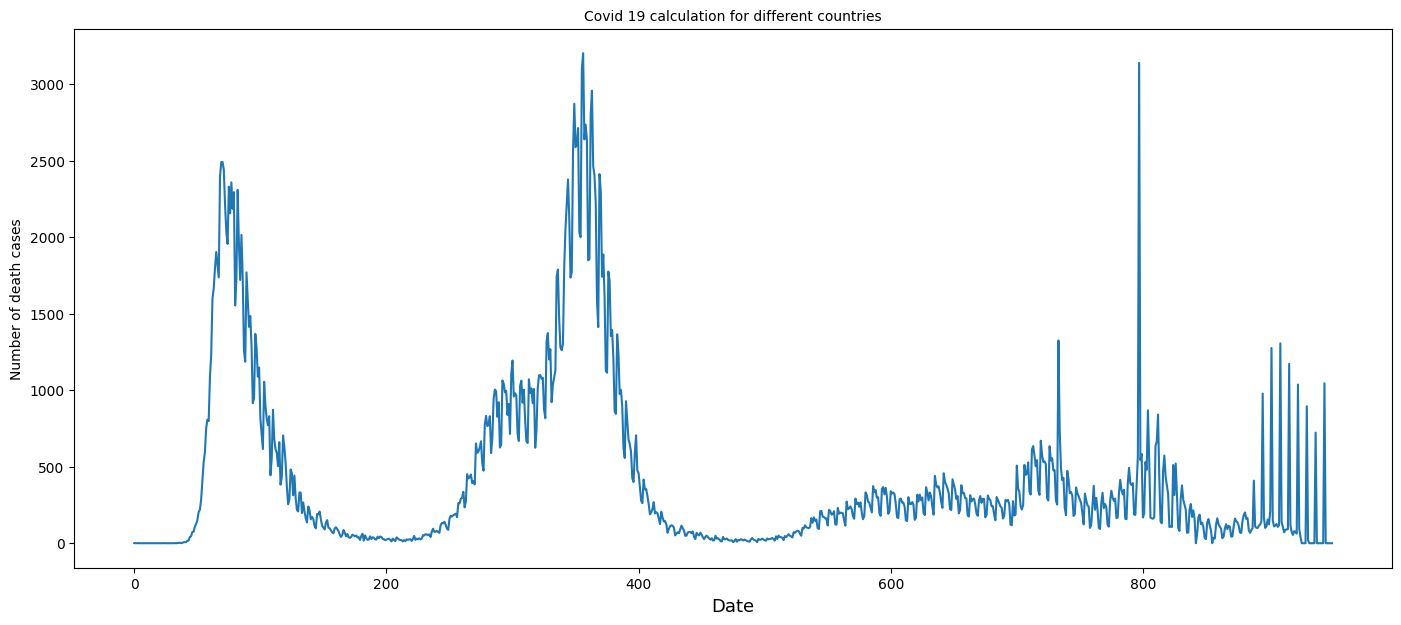

In [29]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data.index,data['new_deaths']);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

Text(0.5, 0, 'Date')

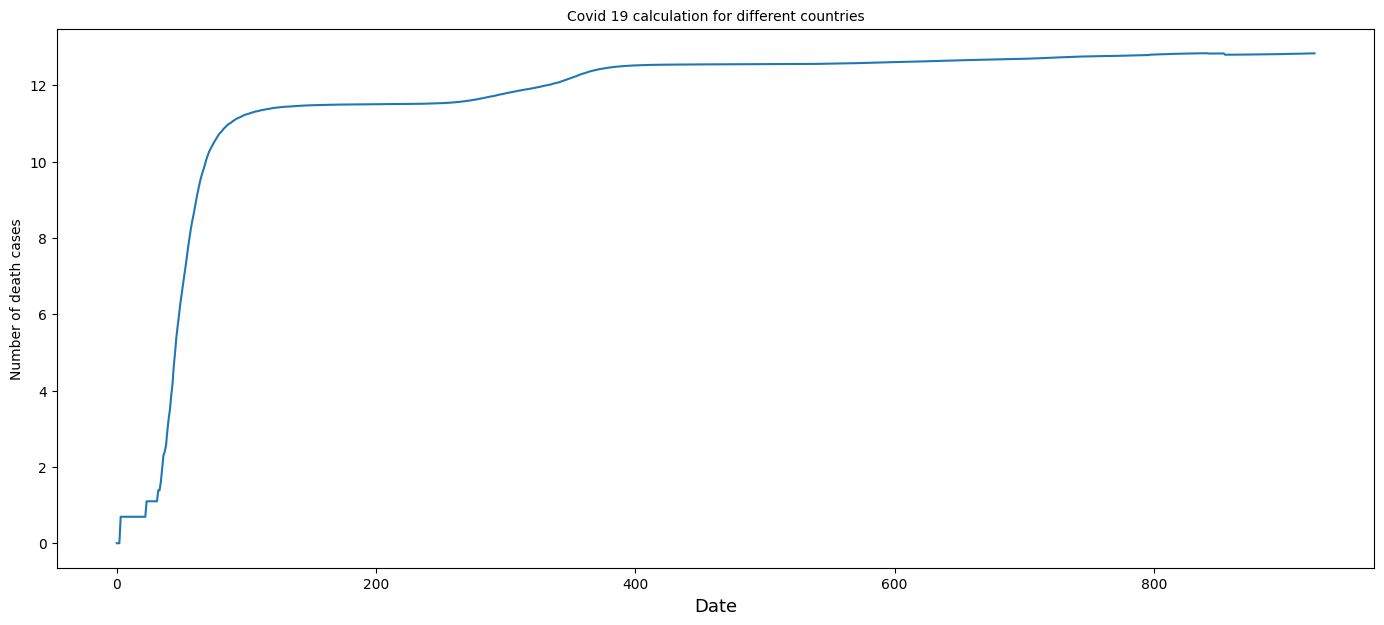

In [30]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data.index[:925],np.log(data['total_deaths'][:925]));
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

<AxesSubplot:xlabel='new_deaths', ylabel='Count'>

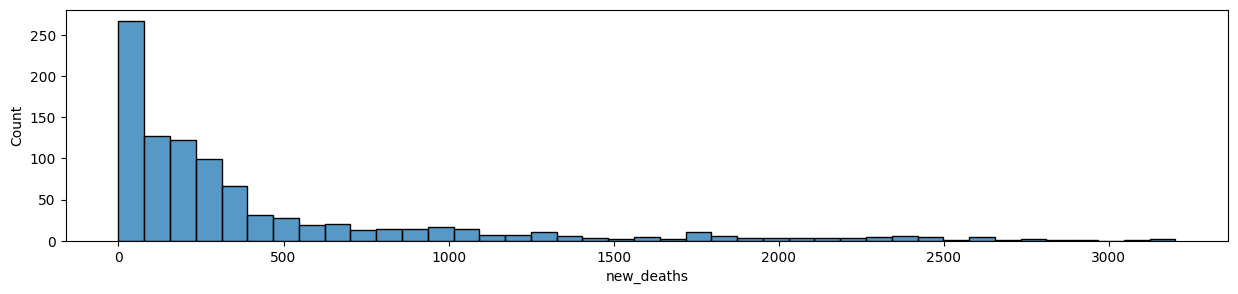

In [31]:

plt.figure(figsize=(15,3))
sns.histplot(data['new_deaths'])

# splitting of data into x and y

In [10]:
X=data_index.drop(columns=['total_deaths','new_deaths','new_cases'])
y=data_index['total_deaths']

In [11]:
X

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,...,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15
date,,,,,,,,,,,,,,,,,,,,,
2020-03-17,0.082695,0.114918,0.142755,321.0,0.084806,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-18,0.086331,0.120439,0.142755,372.0,0.088239,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-19,0.093624,0.131460,0.142755,621.0,0.095126,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-20,0.093624,0.131460,0.142755,793.0,0.095126,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-21,0.105800,0.142501,0.142755,1021.0,0.106591,0.0,0.0,0.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-06,0.000000,0.000000,0.000000,34477539.0,0.062229,470898070.0,186618522.0,171809197.0,117896301.0,684425.0,...,683965.0,683851.0,683622.0,683397.0,683397.0,683397.0,683233.0,683076.0,682549.0,682549.0
2022-09-07,0.000000,0.000000,0.000000,34477539.0,0.062229,470910315.0,186624508.0,171811546.0,117900233.0,684425.0,...,683965.0,683965.0,683851.0,683622.0,683397.0,683397.0,683397.0,683233.0,683076.0,682549.0
2022-09-08,0.000000,0.000000,0.000000,34477539.0,0.062229,470943250.0,186632925.0,171821267.0,117915066.0,684425.0,...,684262.0,683965.0,683965.0,683851.0,683622.0,683397.0,683397.0,683397.0,683233.0,683076.0


## scaling data

In [12]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

# splitting data into train and test set

In [13]:
n = len(X)
X_train = X[0:850]
X_test=X[850:]
y_train=y[0:850]
y_test=y[850:]

# Model

In [14]:
model =SVR(C=5, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

In [46]:
param={'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},

grid_search = GridSearchCV(model, param_grid = param, 
                      cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

Fitting 2 folds for each of 144 candidates, totalling 288 fits
[CV] END C=1, coef0=0.01, degree=3, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ..C=1, coef0=0.01, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=3, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=3, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=8, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ..C=1, coef0=0.01, degree=8, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=8, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=8, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=1, coef0=0.01, degree=8, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=1, coef0=10, degree=3, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=1, coef0=10, degree=

SVR(C=5, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

[CV] END .C=1, coef0=0.01, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .C=1, coef0=0.01, degree=8, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=8, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=8, gamma=scale, kernel=poly; total time= 2.0min
[CV] END ..C=5, coef0=10, degree=8, gamma=scale, kernel=poly; total time=  58.7s
[CV] END C=10, coef0=0.01, degree=8, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=10, coef0=0.01, degree=8, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=10, coef0=0.01, degree=8, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=10, coef0=0.01, degree=8, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=10, coef0=10, degree=3, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=10, coef0=10, degree=3, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ..C=10, coef0=10, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..C=10, c

## fitting the model for train and test set

In [ ]:
model.fit(X_train,y_train)

## prediction

In [49]:
y_pred=model.predict(X_test)

[CV] END C=10, coef0=0.5, degree=8, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .C=10, coef0=0.5, degree=8, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .C=10, coef0=0.5, degree=8, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..C=10, coef0=0.5, degree=8, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..C=10, coef0=0.5, degree=8, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=10, coef0=0.5, degree=8, gamma=auto, kernel=sigmoid; total time=   0.1s
[CV] END C=10, coef0=0.5, degree=8, gamma=auto, kernel=sigmoid; total time=   0.1s
[CV] END C=10, coef0=0.5, degree=8, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=10, coef0=0.5, degree=8, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=10, coef0=0.5, degree=8, gamma=scale, kernel=poly; total time= 1.8min


## evaluating model performance

In [50]:
score=mean_absolute_percentage_error(y_test, y_pred)
score

0.008654573479903295

[CV] END .C=1, coef0=0.01, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=3, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .C=1, coef0=0.01, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=8, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .C=1, coef0=0.01, degree=8, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=8, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END .C=1, coef0=0.01, degree=8, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .C=1, coef0=0.01, degree=8, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....C=1, coef0=10, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....C=1, coef0=10, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..C=1, coef0=10, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..C=1, coef0

In [22]:
y_pred.shape

(191,)

Text(0.5, 0, 'Date')

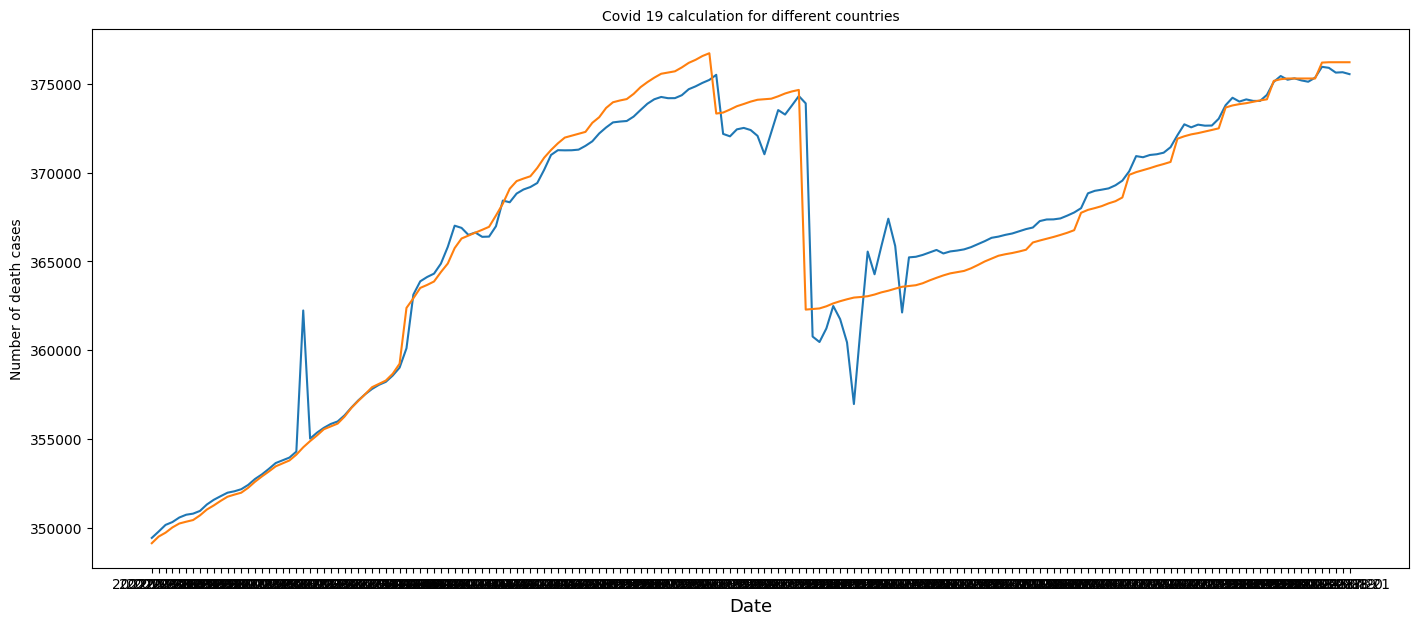

In [52]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(y_test.index[:175],y_pred[:175]);
plt.plot(y_test.index[:175],y_test[:175]);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)